## Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/Dataset

Mounted at /content/drive
dengue_features_test.csv   dengue_labels_train.csv
dengue_features_train.csv  submission_format.csv


## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose as decompose
from pandas import Series

# 1. Data Ingestion

The study consists of data for two cities: __*San Juan*__ and __*Iquitos*__

The dataset consists of two parts
* __dengue_features_train.csv__ : Contains readings for all the factors considered in the study (like humidity, temperature, etc.)
* __dengue_labels_train.csv__ : Contains the number of Dengue cases reported on a weekly basis.

In [2]:
features = pd.read_csv('drive/MyDrive/Dataset/dengue_features_train.csv')
cases = pd.read_csv('drive/MyDrive/Dataset/dengue_labels_train.csv')

# 2. Summary Statistics

In [3]:
features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [4]:
cases.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


# 2.1 Missing Data and Outliers

In [9]:
featuresNullVals = features.isnull().sum()
print(featuresNullVals)
print(f"\nTotal Missing data = {featuresNullVals.sum()}")

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [10]:
casesNullVals = cases.isnull().sum()
print(casesNullVals)
print(f"\nTotal Missing data = {casesNullVals.sum()}")

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

Total Missing data = 0


## Counting number of rows and columns in the dataset

In [5]:
print(f"Number of attributes {len(df.columns)}")
print(f"Number of rows {len(df)}")

Number of attributes 24
Number of rows 1456


## Convert *week_start_date* object into dateTime object

In [6]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

## Join the tables of training dataset with targets based on common columns of *year*, *weekofyear*, *city*

In [7]:
df_cases_time = pd.merge(df,df_labels,on=["year","weekofyear","city"])
print_cols = ["city","year","weekofyear","week_start_date","total_cases"]
print(df_cases_time[print_cols])

     city  year  weekofyear week_start_date  total_cases
0      sj  1990          18      1990-04-30            4
1      sj  1990          19      1990-05-07            5
2      sj  1990          20      1990-05-14            4
3      sj  1990          21      1990-05-21            3
4      sj  1990          22      1990-05-28            6
...   ...   ...         ...             ...          ...
1451   iq  2010          21      2010-05-28            5
1452   iq  2010          22      2010-06-04            8
1453   iq  2010          23      2010-06-11            1
1454   iq  2010          24      2010-06-18            1
1455   iq  2010          25      2010-06-25            4

[1456 rows x 5 columns]


## Indexing with *week_start_date* 

In [ ]:
df_cases_time = df_cases_time.set_index('week_start_date')

## City San Juan data

In [11]:
df_labels_sj = df_cases_time[df_cases_time["city"]=='sj']
print(df_labels_sj.head(5))

  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                 

## City Iquitos data

In [12]:
# Iquitos city labels
df_labels_iq = df_cases_time[df_cases_time["city"]=='iq']
print(df_labels_iq.head(5))

    city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
936   iq  2000          26      2000-07-01  0.192886  0.132257  0.340886   
937   iq  2000          27      2000-07-08  0.216833  0.276100  0.289457   
938   iq  2000          28      2000-07-15  0.176757  0.173129  0.204114   
939   iq  2000          29      2000-07-22  0.227729  0.145429  0.254200   
940   iq  2000          30      2000-07-29  0.328643  0.322129  0.254371   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
936  0.247200                 25.41             296.740000  ...   
937  0.241657                 60.61             296.634286  ...   
938  0.128014                 55.52             296.415714  ...   
939  0.200314                  5.60             295.357143  ...   
940  0.361043                 62.76             296.432857  ...   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
936                             92.418571                        

## Line plot to vizualize *Number of cases vs time*, *Humidity vs time* and *temperature vs time*

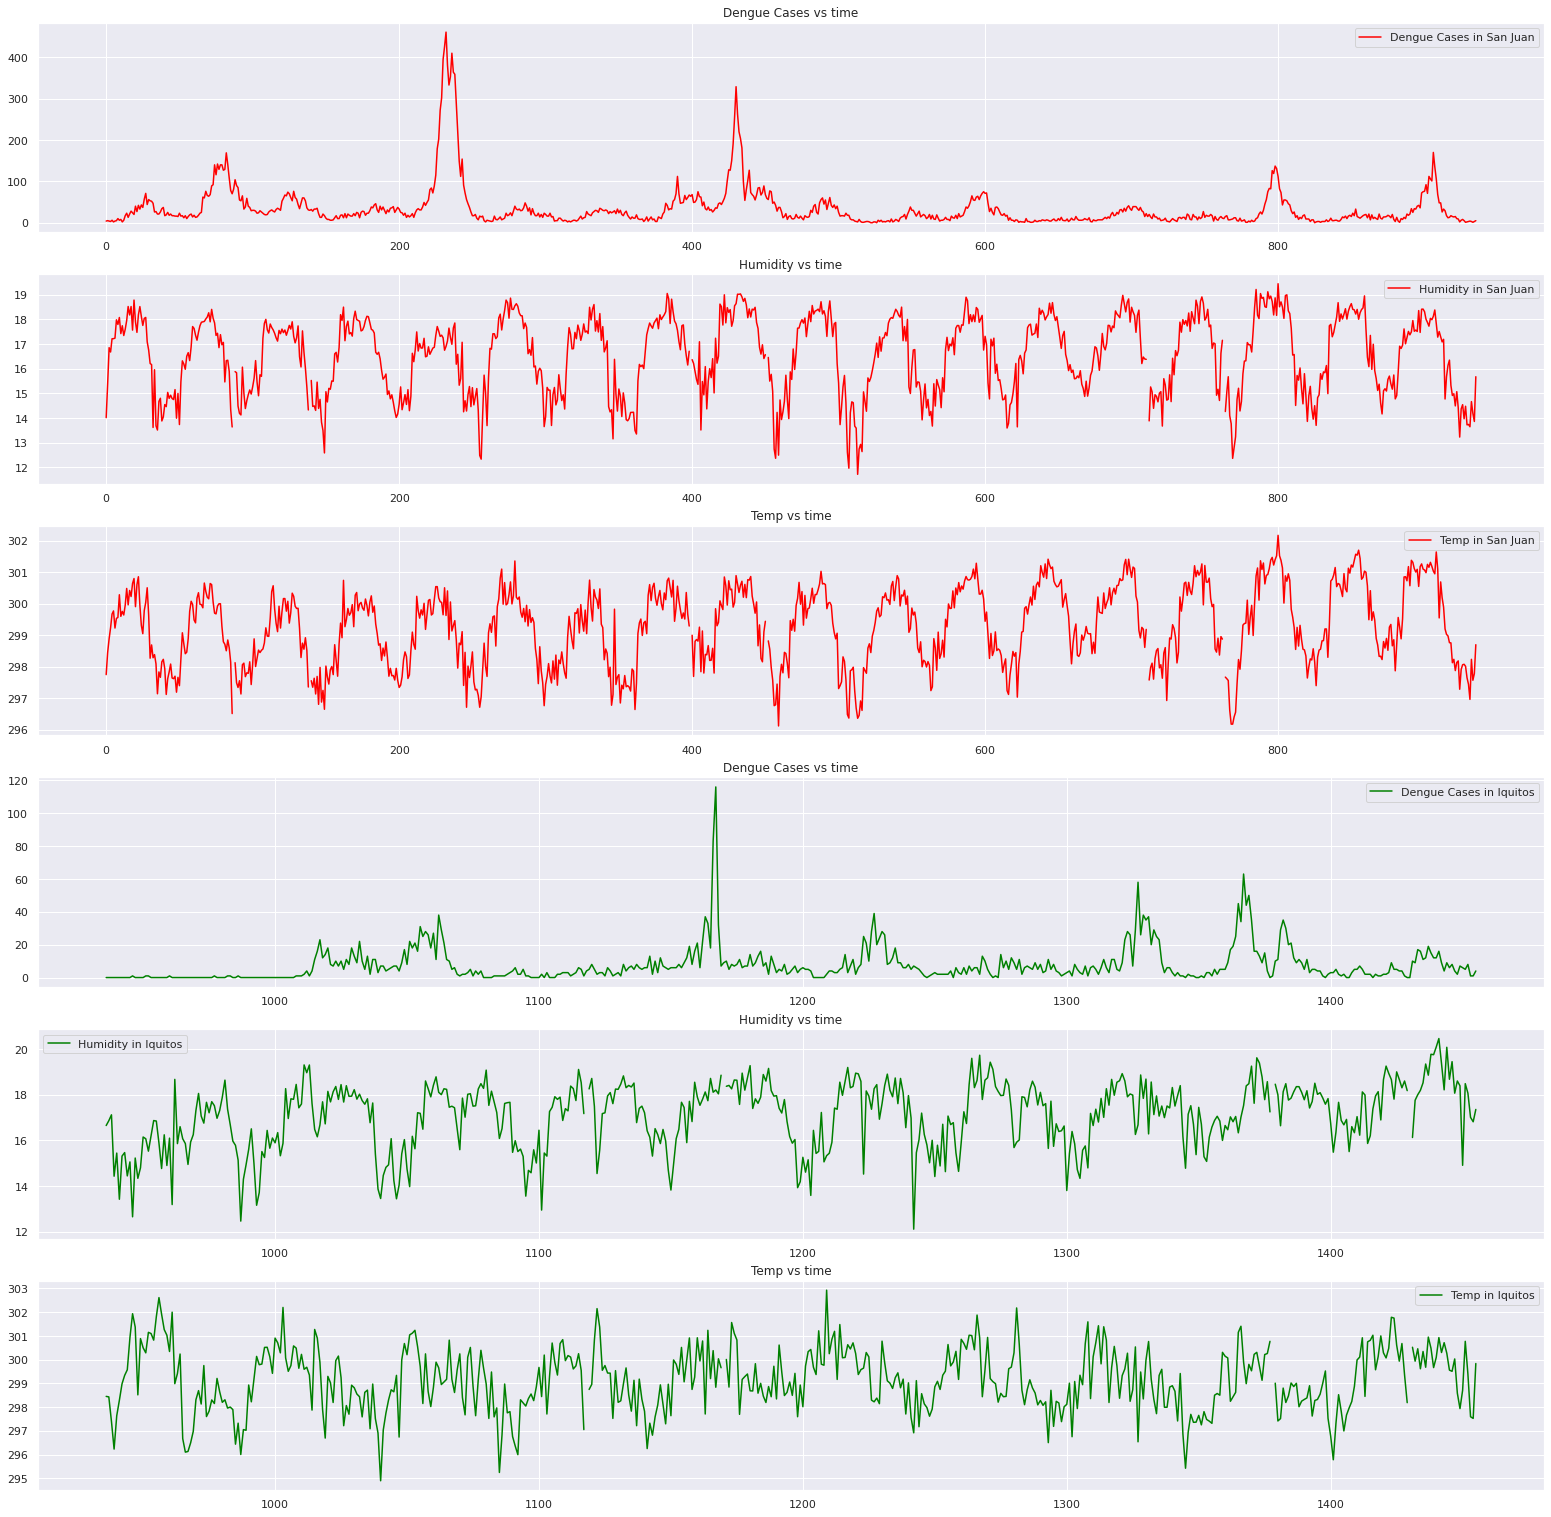

In [13]:
plt.rcParams['figure.figsize']=(27,27) #rc -> runtime config
fig,ax = plt.subplots(6, 1) 

all_concerns = [
             'total_cases',
             'reanalysis_specific_humidity_g_per_kg',
             'reanalysis_avg_temp_k'
             ]
labels=[
        'Dengue Cases',
        'Humidity',
        'Temp'
]

colors=["red","green"]
# for j,city in enumerate(["sj","iq"]):
#   if city=="sj":   use_df = df_labels_sj
#   elif city=="iq": use_df = df_labels_iq
#   else:
#       print("Invalid city")
#       break

for i,concern in enumerate(all_concerns):
  ax[i].plot(
      df_labels_sj.index,
      df_labels_sj[concern],
      color=colors[0],
      label=f"{labels[i]} in San Juan"
  )
  ax[i].set_title(f"{labels[i]} vs time")
  ax[i].legend()

for i,concern in enumerate(all_concerns):
  ax[i+3].plot(
      df_labels_iq.index,
      df_labels_iq[concern],
      color=colors[1],
      label=f"{labels[i]} in Iquitos"
  )
  ax[i+3].set_title(f"{labels[i]} vs time")
  ax[i+3].legend()
        

plt.show()

## Finding number of duplicate rows

In [ ]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 24)

## Finding the number of yearly cases for the cities sj and iq

In [ ]:
df_sj = df_labels[df_labels['city']=='sj']

df_sj_yearly = None
df_sj["yearly_cases"] = df_sj.groupby(["year"])["total_cases"].transform('sum') #group by each year and sum the totoal monthly cases

df_sj_yearly = df_sj[["year","yearly_cases"]]
df_sj_yearly=df_sj_yearly.drop_duplicates() #remove values stored for same year

df_iq_yearly = None
df_iq = df_labels[df_labels["city"]=="iq"]

df_iq["yearly_cases"] = df_iq.groupby(["year"])["total_cases"].transform('sum')
df_iq_yearly = df_iq[["year","yearly_cases"]]
df_iq_yearly=df_iq_yearly.drop_duplicates() #remove values stored for same year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


## Box-Plots to visualize outliers in the number of cases for both the cities

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


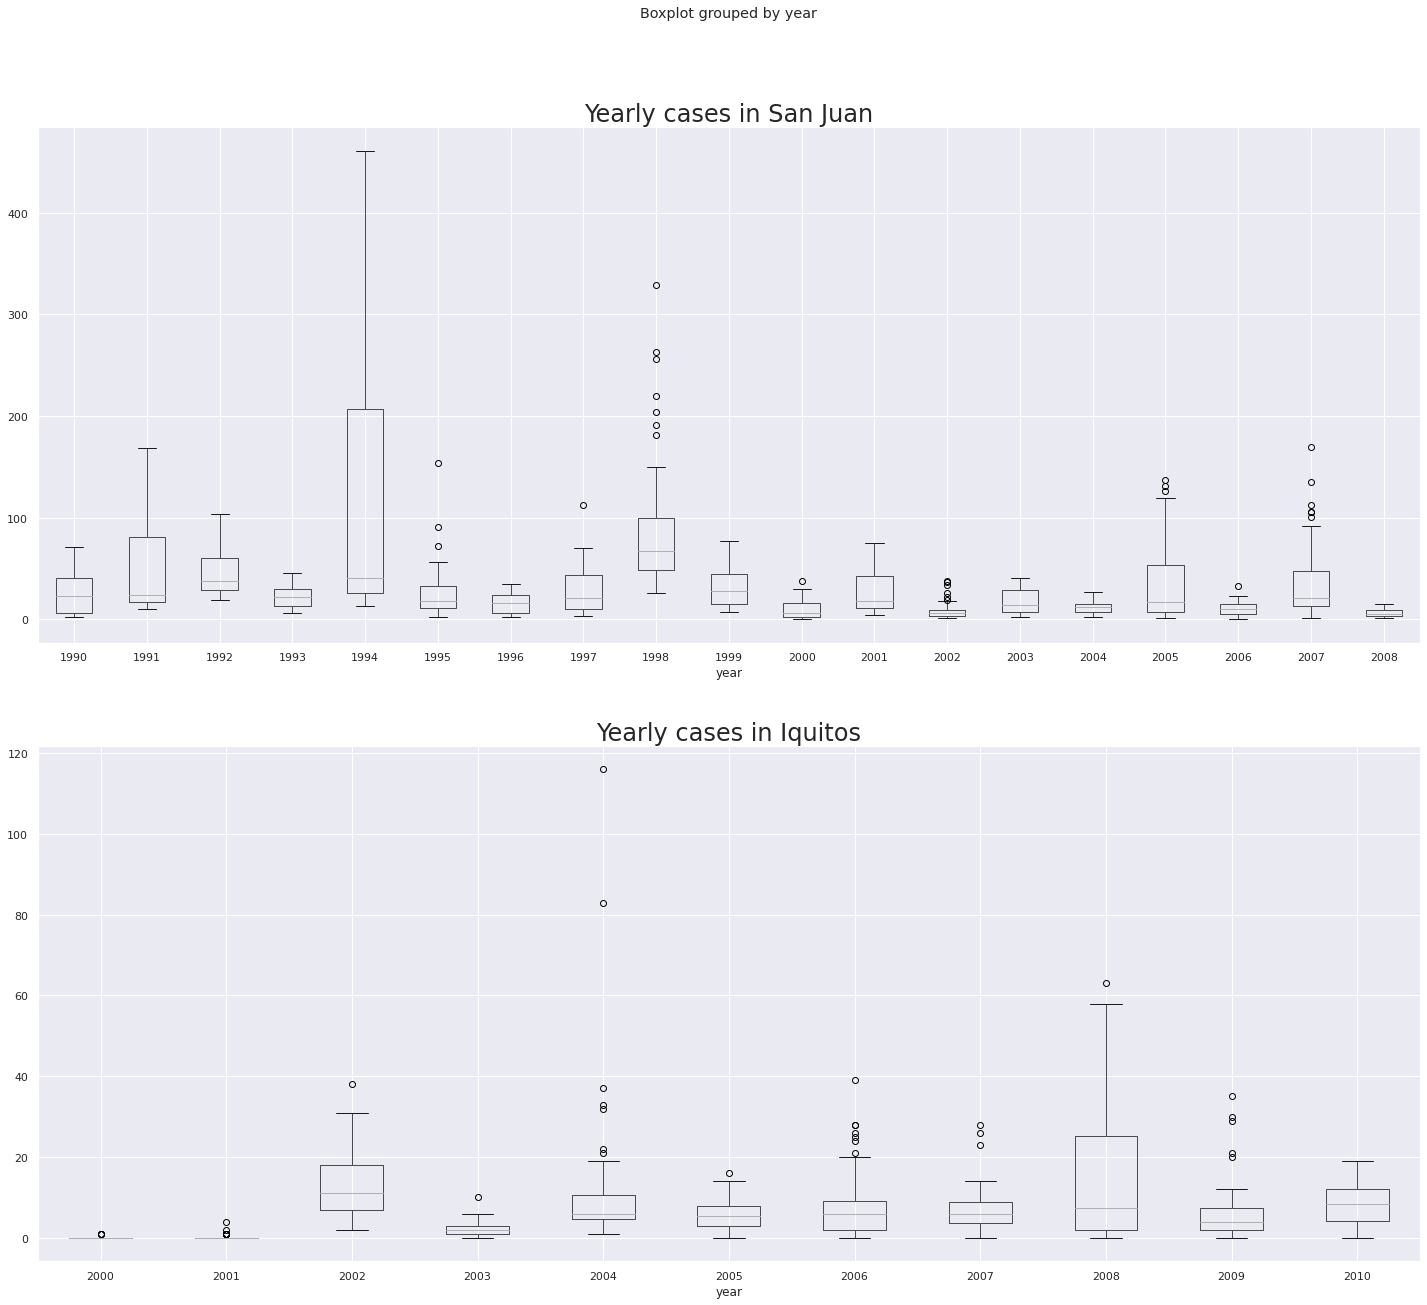

In [ ]:
#box plot for  every year
plt.rcParams["figure.figsize"] = 24,21

#2 subplots
fig,axs = plt.subplots(2,1)

#number of cases every year
df_sj.boxplot(by='year',column=['total_cases'],ax=axs[0])
axs[0].set_title("Yearly cases in San Juan",size=24)

df_iq.boxplot(by="year",column=["total_cases"],ax=axs[1])
axs[1].set_title("Yearly cases in Iquitos",size=24)

plt.show()

In [ ]:
df_sj.head()

,city,year,weekofyear,total_cases,yearly_cases
0,sj,1990,18,4,866
1,sj,1990,19,5,866
2,sj,1990,20,4,866
3,sj,1990,21,3,866
4,sj,1990,22,6,866


## Understanding the distribution of data for *total number of cases* of both the cities,*specific humidity*,*air temperature* and *total number of cases*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: ignored

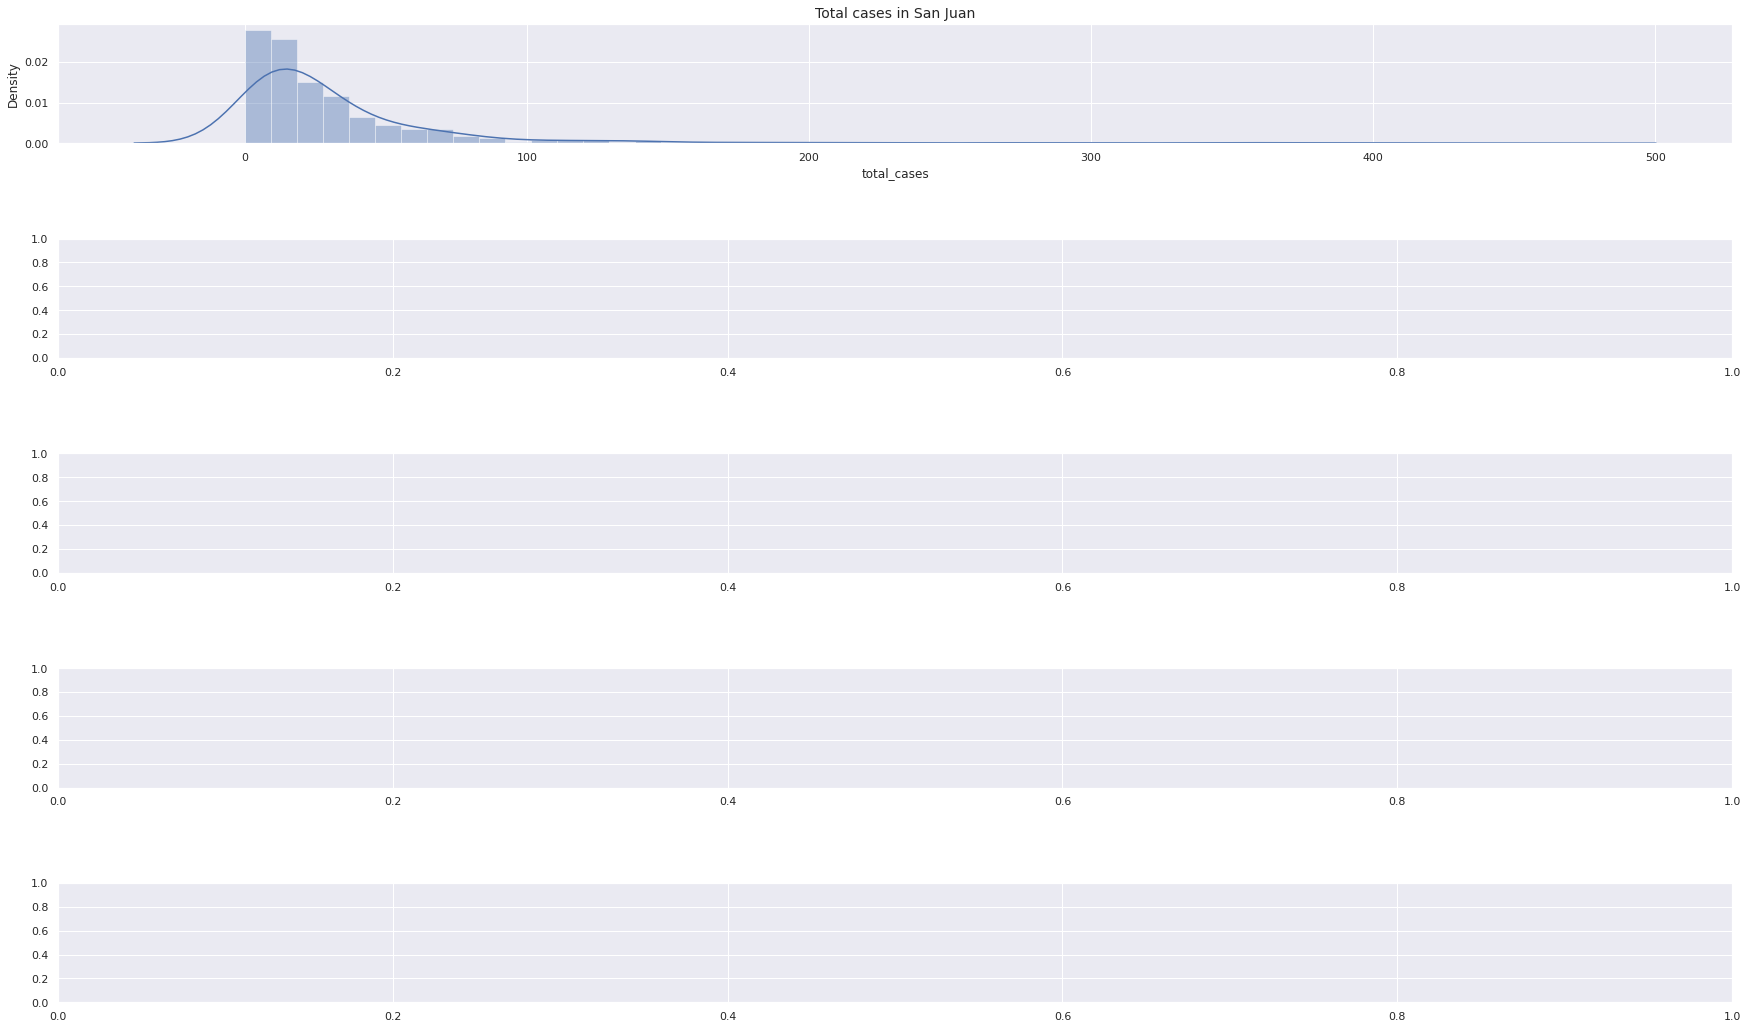

In [ ]:
plt.rcParams["figure.figsize"] = 30,18
fig,axs = plt.subplots(5,1)
plt.subplots_adjust(hspace=0.8) #space between plots

#for total number of yearly cases of sj
sns.distplot(df_sj["total_cases"],ax=axs[0])
axs[0].set_title("Total cases in San Juan",size=14)

#humidity
sns.distplot(df_sj["reanalysis_specific_humidity_g_per_kg"],ax=axs[2])
axs[2].set_title("Specific humidity in San Juan",size=14)

#temperature
sns.distplot(df_sj["reanalysis_avg_temp_k"],ax=axs[3])
axs[3].set_title("Air temperature in San Juan",size=14)

#for yearly number of cases in iq
sns.distplot(df_iq["total_cases"],ax=axs[1])
axs[1].set_title("Total cases in Iquitos",size=14)

# #all cases
# sns.distplot(df_cases_time["total_cases"],ax=axs[4])
# axs[4].set_title("Total cases",size=14)

#humidity
sns.distplot(df_iq["reanalysis_specific_humidity_g_per_kg"],ax=axs[2])
axs[2].set_title("Specific humidity in Iquitos",size=14)

#temperature
sns.distplot(df_iq["reanalysis_avg_temp_k"],ax=axs[3])
axs[3].set_title("Air temperature in Iquitos",size=14)

plt.show()

The error is due to missing data point ie missing dates within a week : ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

Text(0.5, 1.0, 'Correlation Matrix')

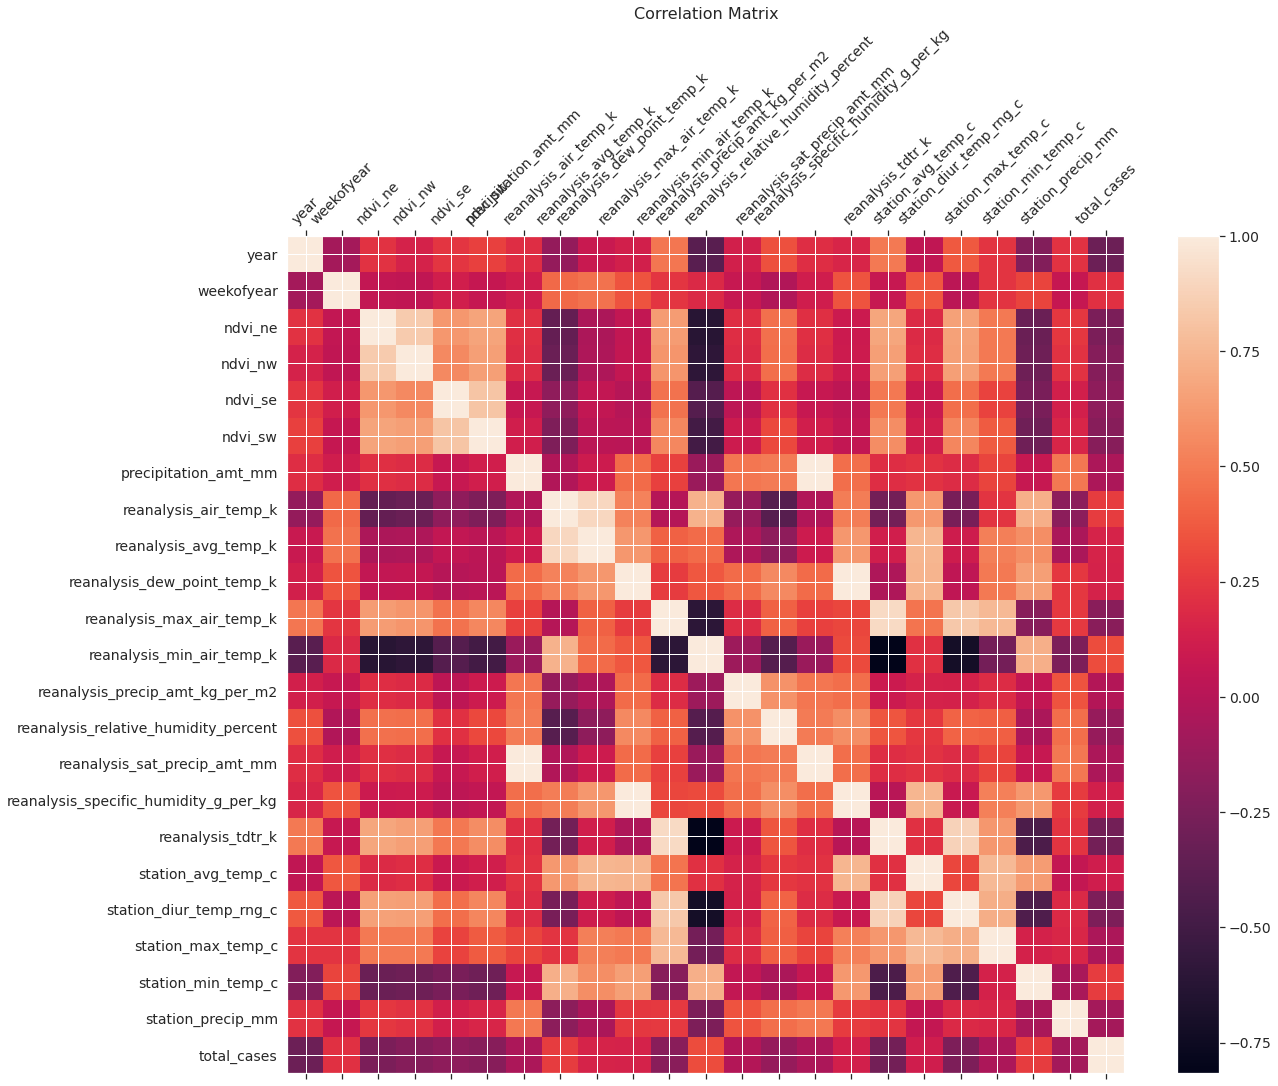

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_cases_time.corr(), fignum=f.number)
plt.xticks(range(df_cases_time.select_dtypes(['number']).shape[1]), df_cases_time.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_cases_time.select_dtypes(['number']).shape[1]), df_cases_time.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)